# ECE 657A ASSIGNMENT 1
## Kaggle Competition

###### Jubilee Imhanzenobe and Olohireme Ajayi

In [158]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [159]:
# defining function for plotting correlation heatmap
def plot_heatmap(correlation):
    plt.figure(figsize=(15, 8))
    ax = sns.heatmap(correlation,annot=True,fmt='.3f',linewidths=0.3,annot_kws={"size": 14})
    plt.xticks(fontsize=12) 
    plt.yticks(fontsize=12) 
    plt.title('Correlation between features', fontsize=20)
    ax.figure.axes[-1].tick_params(labelsize=18) # To increase fontsize of colorbar ticks
    lim = len(correlation.columns)
    ax.set_ylim([0,lim]) # to make the map display correctly without trimming the edges
    plt.show()
    return

In [160]:
# importing the dataset
dataset = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [161]:
data = dataset[['cp','slope','thalach','thal','ca','target']]
test_data = test_data[['cp','slope','thalach','thal','ca']]

##### Checking for outliers

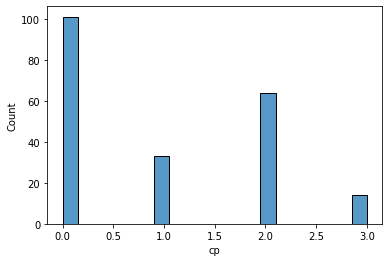

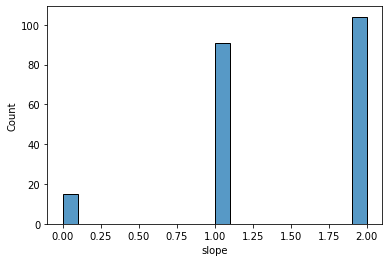

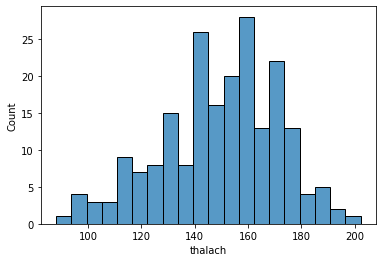

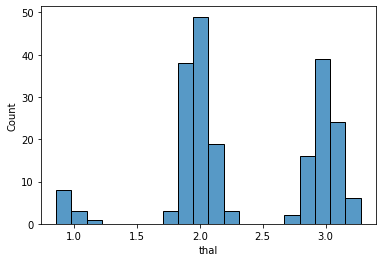

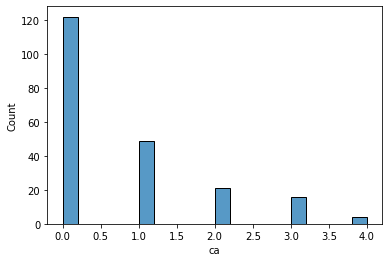

In [162]:
for column in data.iloc[:,:-1].columns:
    plt.figure()
    sns.histplot(data = data, x = column, bins = 20)
    plt.show()

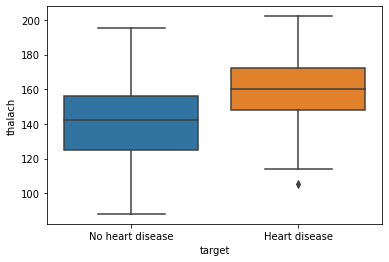

In [163]:
# finer detection using box plot (mainly for numerical columns)
ax = sns.boxplot(x="target", y="thalach", data=data)
ax.set_xticks(range(2))
ax.set_xticklabels(['No heart disease','Heart disease'])
plt.show()

In [164]:
# Handling Outliers in thalach by replacing with nan
outliers_dict = {"thalach": 1}
for column, label in outliers_dict.items():
    Q1 = data[column][data["target"] == label].quantile(0.25)
    Q3 = data[column][data["target"] == label].quantile(0.75)
    IQR = Q3 - Q1 #Interquartile range
    fence_low = Q1 - (1.5 * IQR)
    fence_high = Q3 + (1.5 * IQR)
    
    df2 = pd.DataFrame(data[data['target'] == label][column])
    
    for index in df2[df2[column] < fence_low].index:
        data.loc[index, column] = np.nan
    for index in df2[df2[column] > fence_high].index:
        data.loc[index, column] = np.nan

C:\Users\jubil\Anaconda3\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


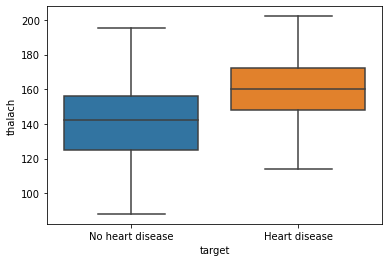

In [165]:
# Replotting box plot to confirm outlier removal
ax = sns.boxplot(x="target", y="thalach", data=data)
ax.set_xticks(range(2))
ax.set_xticklabels(['No heart disease','Heart disease'])
plt.show()

In [166]:
# creating a list of the variable types
cats = ['cp', 'thal', 'slope']
ords = ['ca']
nums = ['thalach']
target = ['target']

In [167]:
# removing the noise in thal to convert it to categorical data
data.loc[:,'thal'] = round(data.loc[:,'thal'], 0)

C:\Users\jubil\Anaconda3\lib\site-packages\pandas\core\indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


##### Data Cleaning

In [168]:
# Handling Outliers
group_mode = data[["ca", "target"]].groupby("target").agg(lambda x:x.value_counts().index[0])
for index in data[data["ca"] == 4].index:
    target = data.iloc[index, -1]   
    data.loc[index, "ca"] = group_mode["ca"][target]         

C:\Users\jubil\Anaconda3\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [169]:
# checking for missing values in columns
for column in data.columns:
    print(column.upper(), "-", data[column].isna().sum())

CP - 0
SLOPE - 2
THALACH - 5
THAL - 1
CA - 0
TARGET - 0


In [170]:
# checking for missing values in rows
for i in range(len(data)):
    row = data.iloc[i, :]
    if row.isna().sum() > 0:
        print(i , ": ", row.isna().sum())

5 :  1
17 :  1
26 :  1
61 :  1
83 :  1
122 :  1
177 :  1
203 :  1


In [171]:
# Handling missing values for categorical features
group_mode = data[["thal", "target"]].groupby("target").agg(lambda x:x.value_counts().index[0])
for index in data[data["thal"].isna()].index:
    target = data.iloc[index, -1]   
    data["thal"][index] = group_mode["thal"][target]
    
""" Handling nan in slope """
group_mode = data[["slope", "target"]].groupby("target").agg(lambda x:x.value_counts().index[0])
for index in data[data["slope"].isna()].index:
    target = data.iloc[index, -1]   
    data.loc[index, "slope"] = group_mode["slope"][target]         
del(index, group_mode, target)

C:\Users\jubil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\jubil\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [172]:
# Handling missing values for numeric features
group_mean = data.groupby("target").mean()
for column in data.columns:
    for index in data[data[column].isna()].index:
        target = data.iloc[index,-1]
        if (data[column].max() - data[column].min() > 5) or data[column].dtype == "float64":
            data[column][index] = group_mean[column][target]

C:\Users\jubil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [173]:
# Replacing categorical variables with descriptions
data.cp = data.cp.replace({0:'Asympt.', 1:'Atypical', 2:'Non', 3:'Typical'})
data.thal = data.thal.replace({0:'NA', 1:'Fixed', 2:'Normal', 3:'Reverse'})
data.slope = data.slope.replace({0:'down', 1:'up', 2:'flat'})

test_data.cp = test_data.cp.replace({0:'Asympt.', 1:'Atypical', 2:'Non', 3:'Typical'})
test_data.thal = test_data.thal.replace({0:'NA', 1:'Fixed', 2:'Normal', 3:'Reverse'})
test_data.slope = test_data.slope.replace({0:'down', 1:'up', 2:'flat'})

C:\Users\jubil\Anaconda3\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Building the KNN Model

In [174]:
# One hot encoding categorical features
categorical_cols = ['cp', 'thal', 'slope'] 

df = pd.get_dummies(data.iloc[:,:-1], columns = categorical_cols)
df["target"] = data["target"]
data = df

df = pd.get_dummies(test_data, columns = categorical_cols)
test_data = df

In [175]:
data.head()

,thalach,ca,cp_Asympt.,cp_Atypical,cp_Non,cp_Typical,thal_Fixed,thal_Normal,thal_Reverse,slope_down,slope_flat,slope_up,target
0,115.952071,0,0,0,1,0,0,1,0,0,0,1,1
1,135.970028,0,1,0,0,0,0,0,1,0,0,1,0
2,152.210039,0,0,0,1,0,0,1,0,0,1,0,0
3,143.049207,0,0,0,1,0,0,1,0,0,0,1,1
4,143.099327,1,1,0,0,0,0,0,1,0,0,1,0


In [176]:
test_data.drop("thal_NA", axis = 1, inplace = True)

In [177]:
# separating ths dataset into matrix of features and target
X_train = data.iloc[:,:-1].values
y_train = data.iloc[:,-1].values
X_test = test_data.values

##### feature scaling

In [178]:
data.head()

,thalach,ca,cp_Asympt.,cp_Atypical,cp_Non,cp_Typical,thal_Fixed,thal_Normal,thal_Reverse,slope_down,slope_flat,slope_up,target
0,115.952071,0,0,0,1,0,0,1,0,0,0,1,1
1,135.970028,0,1,0,0,0,0,0,1,0,0,1,0
2,152.210039,0,0,0,1,0,0,1,0,0,1,0,0
3,143.049207,0,0,0,1,0,0,1,0,0,0,1,1
4,143.099327,1,1,0,0,0,0,0,1,0,0,1,0


In [179]:
# Normalizing numerical features
X_scaler = StandardScaler()
X_train[:,:1] = X_scaler.fit_transform(X_train[:,:1])
X_test[:,:1] = X_scaler.transform(X_test[:,:1])
X_test[0]

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

##### Building the optimized model  (uniform weight and manhattan distance)

In [180]:
classifier = KNeighborsClassifier(n_neighbors = 5, weights = "distance", p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [181]:
# Predicting the test set result with optimized model
y_pred = classifier.predict(X_test)

result = pd.DataFrame(columns=['id','target'])
result['id'] = test_data.index
result['target'] = y_pred

result.set_index(keys='id', inplace=True)

result.to_csv('submission_1.csv')